In [1]:
zip_path = '/content/drive/My\ Drive/Colab_Test/Dataset/6.\ Deep\ Learning/cats-dogs.zip'
!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

#Function

In [ ]:
def evaluate_accuracy(history):
  history_dataframe = pd.DataFrame(history.history)

  max_acc_index = history_dataframe[history_dataframe['accuracy']==max(history_dataframe['accuracy'])].index.values
  max_acc = history_dataframe.loc[max_acc_index]['accuracy']
  max_val_acc_index = history_dataframe[history_dataframe['val_accuracy']==max(history_dataframe['val_accuracy'])].index.values
  max_val_acc = history_dataframe.loc[max_val_acc_index]['val_accuracy']

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(max_acc_index, max_acc, 'o', c='k', ms=4, label='max accuracy')
  plt.plot(max_val_acc_index, max_val_acc, 'o', c='k', ms=4, label='max val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Maximum accuracy :", max_acc)
  print("---------------------------------------")
  print("Minimun validation accuracy :", max_val_acc)

#OOP Import

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, RMSprop

#Best CNN Tuning Hyperparameter

#SGD (Augmented)

In [ ]:
dataset_dir = '/content/'

In [ ]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=30, target_size=(224, 224))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=30, target_size=(224, 224))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

vgg_conv = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = SGD(lr = 0.001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics =['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              18875392  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1025      
Total params: 33,591,105
Trainable params: 18,876,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_model_augmented = fine_tuned_model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=50)

Epoch 1/50
100/100 [==============================] - 149s 1s/step - loss: 0.4719 - accuracy: 0.7667 - val_loss: 0.3012 - val_accuracy: 0.8814
Epoch 2/50
100/100 [==============================] - 146s 1s/step - loss: 0.3375 - accuracy: 0.8531 - val_loss: 0.2500 - val_accuracy: 0.9036
Epoch 3/50
100/100 [==============================] - 142s 1s/step - loss: 0.3122 - accuracy: 0.8628 - val_loss: 0.2398 - val_accuracy: 0.9023
Epoch 4/50
100/100 [==============================] - 138s 1s/step - loss: 0.2793 - accuracy: 0.8767 - val_loss: 0.2269 - val_accuracy: 0.9050
Epoch 5/50
100/100 [==============================] - 136s 1s/step - loss: 0.2771 - accuracy: 0.8805 - val_loss: 0.2151 - val_accuracy: 0.9134
Epoch 6/50
100/100 [==============================] - 140s 1s/step - loss: 0.2591 - accuracy: 0.8894 - val_loss: 0.2029 - val_accuracy: 0.9201
Epoch 7/50
100/100 [==============================] - 145s 1s/step - loss: 0.2501 - accuracy: 0.8931 - val_loss: 0.2128 - val_accuracy: 0.9103

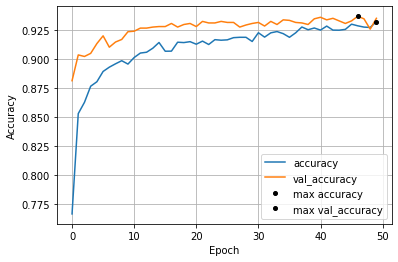

Maximum accuracy : 49    0.932308
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 46    0.936945
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_model_augmented)

#RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

opt = RMSprop(
    learning_rate=0.01, rho=0.9, momentum=0.99, epsilon=1e-07, centered=False,
    name='RMSprop')

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 256)     7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 256)     0         
_________________________________________________________________
dense_2 (Dense)              (None, 100, 100, 128)     32896     
_________________________________________________________________
dense_3 (Dense)              (None, 100, 100, 1)       129       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 1)         0         
_________________________________________________________________
dense_4 (Dense)              (None, 50, 50, 64)        128       
_________________________________________________________________
dense_5 (Dense)              (None, 50, 50, 1)        

In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
425/425 [==============================] - 56s 131ms/step - loss: 0.7085 - accuracy: 0.4891 - val_loss: 0.7040 - val_accuracy: 0.5027
Epoch 2/30
425/425 [==============================] - 55s 130ms/step - loss: 0.7022 - accuracy: 0.4974 - val_loss: 0.7140 - val_accuracy: 0.5027
Epoch 3/30
425/425 [==============================] - 56s 132ms/step - loss: 0.7043 - accuracy: 0.4974 - val_loss: 0.6984 - val_accuracy: 0.5027
Epoch 4/30
425/425 [==============================] - 56s 131ms/step - loss: 0.7122 - accuracy: 0.4974 - val_loss: 0.7039 - val_accuracy: 0.5027
Epoch 5/30
425/425 [==============================] - 56s 132ms/step - loss: 0.7049 - accuracy: 0.4974 - val_loss: 0.7434 - val_accuracy: 0.5027
Epoch 6/30
425/425 [==============================] - 56s 132ms/step - loss: 0.7072 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 7/30
425/425 [==============================] - 

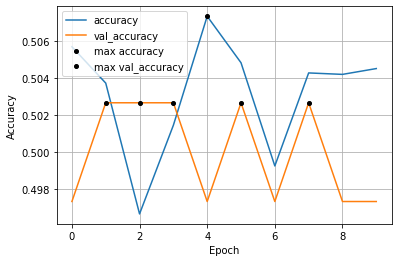

Maximum accuracy : 4    0.507334
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 1    0.502664
2    0.502664
3    0.502664
5    0.502664
7    0.502664
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_base_model)

#Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                10240032  
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 10,240,961
Trainable params: 10,240,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Epoch 1/10
425/425 [==============================] - 56s 132ms/step - loss: 11.6644 - accuracy: 0.4994 - val_loss: 0.6934 - val_accuracy: 0.4973
Epoch 2/10
425/425 [==============================] - 56s 131ms/step - loss: 0.6934 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 3/10
425/425 [==============================] - 56s 132ms/step - loss: 0.6934 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 4/10
425/425 [==============================] - 56s 132ms/step - loss: 0.6936 - accuracy: 0.4956 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 5/10
425/425 [==============================] - 56s 132ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 6/10
425/425 [==============================] - 56s 132ms/step - loss: 0.6933 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 7/10
425/425 [==============================] - 56s 132ms/step - loss: 0.6933 - accuracy: 0.5069 - val_loss: 0.6931 - val_a

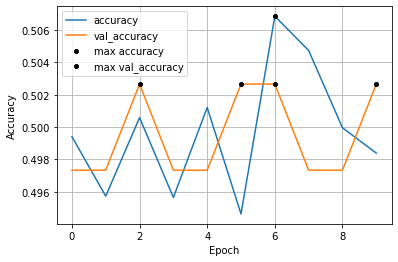

Maximum accuracy : 6    0.506863
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 2    0.502664
5    0.502664
6    0.502664
9    0.502664
Name: val_accuracy, dtype: float64


In [ ]:
evaluate_accuracy(history_base_model)

#Kesimpulan :

**Dari dataset diatas, didapatkan akurasi tertinggi dengan menggunakan Optimization SGD dengan menggunakan Fine Tuning dengan nilai Validasi Accuracy 0.9329 dan Validasi Loss 0.1563.**

**Pada kasus ini, saya melakukan training 50 epochs sehingga machine lebih mengerti dan lebih akurat dalam membedakan Cats dengan Dogs.**